In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import copy

# Objective function
# f = lambda x: -x**4 + 3*x**3
f = lambda x: x**5-10*x**3+4*x
# Initial interval
x0 = 0
x1 = 3
first = x0
last = x1
# Slope of the lines
m = 50
# Number of iterations
iterations = 10
xs = np.linspace(x0 - 1 , x1 + 1, (x1 - x0)*100)

In [2]:
# define intervals as an object
class Interval:
#   each interval must have first, middle and point.
#   and also y which means the highest point.
    def __init__(self, f_pt, m_pt, l_pt):
        self.f_pt = f_pt
        self.m_pt = m_pt
        self.l_pt = l_pt
        self.y = m_pt.y        
#   intervals can be printed as three points
    def __str__(self):
        return '{} {} {}'.format(print(self.f_pt), print(self.m_pt), print(self.l_pt))
    
# define points as an object
class Point:
#   each point must have x and y
    def __init__(self, x, y):
        self.x = x
        self.y = y
#  each point will be printed as (x,y)
    def __str__(self):
        return f"({self.x},{self.y})"

In [9]:
# we look for highest point in intervals
def findHighestPoint(intervals):
    ys = []
    for interval in intervals:
        ys.append(interval.y)
    return intervals[ys.index(max(ys))]

# every selected interval needs to be splited in two
def splitIntervals(h_interval):
    intercepts = Intercepts(h_interval.f_pt.x, h_interval.l_pt.x, h_interval.m_pt.x)
    
    x_point_1 = np.roots([2*m, intercepts[0] - intercepts[3]])[0]
    y_point_1 = m * x_point_1 + intercepts[0]
    a = h_interval.f_pt
    c = Point(x_point_1, y_point_1)
    b = Point(h_interval.m_pt.x, f(h_interval.m_pt.x))
    left_interval = Interval(a, c, b)
    
    x_point_2 = np.roots([2*m, intercepts[2] - intercepts[1]])[0]
    y_point_2 = -m * x_point_2 + intercepts[1]
    a = copy.deepcopy(b)
    c = Point(x_point_2, y_point_2)
    b = h_interval.l_pt
    right_interval = Interval(a, c, b)

    return left_interval, right_interval

# Function to find the intercepts of straight lines
def Intercepts(x0, x1, c):
    intercept1 = f(x0) - m*x0
    intercept2 =  f(x1) + m*x1
    intercept3 = f(c) - m*c
    intercept4 =  f(c) + m*c
    return [intercept1, intercept2, intercept3, intercept4]
    
# ploting intervals    
def plotIntervals(intervals):
#   set axis on x and y
    plt.xlim(first,last)
    plt.ylim(-50,30)
#   plot main function
    plt.plot(xs, f(xs), color = 'cornflowerblue')
#   each time this def is called, it will plot all remaining intervals
    for interval in intervals:
        plt.plot([interval.f_pt.x, interval.m_pt.x], [interval.f_pt.y, interval.m_pt.y], color ='r')
        plt.plot([interval.m_pt.x, interval.l_pt.x], [interval.m_pt.y, interval.l_pt.y], color = 'g')

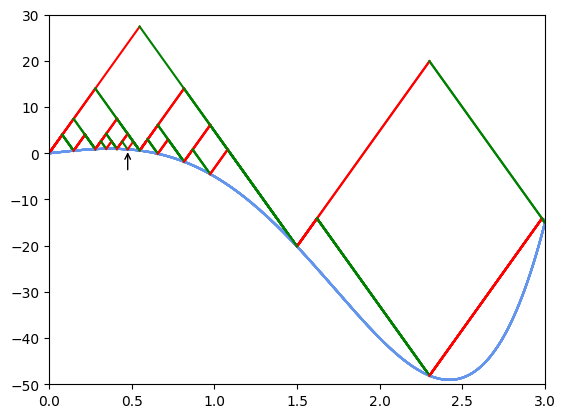

In [10]:
# finding first two intervals
intervals = []
c = (x0 + x1) / 2
initial_interval = Interval(Point(x0,f(x0)), Point(c,f(c)), Point(x1,f(x1)))
first_two_intervals = splitIntervals(initial_interval)
intervals.extend([first_two_intervals[0],first_two_intervals[1]])
plotIntervals(intervals)

# Sawtooth method algorithm
for i in range(iterations):
#   look in "intervals" to find highest point
    h_interval = findHighestPoint(intervals)
    h_p_f = h_interval.m_pt.x
#   interval will be removed and split to two smaller intervals
    intervals.remove(h_interval)
    newIntervals = splitIntervals(h_interval)
#   new intervals will be added to list of intervals
    intervals.extend(newIntervals)
    plotIntervals(intervals)
plt.annotate('', xy=(h_p_f, f(h_p_f)), xytext=(h_p_f, f(h_p_f)-5),
            arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90"))
plt.show()